In [1]:
import pandas as pd
import json

PLAYTIME_THRESHOLD = 10

def convert_game(game: object) -> pd.Series:
    game = pd.json_normalize(game)
    game["playtime_forever"] = game["playtime_forever"].apply(lambda p: p / 60)
    game = game.where(lambda p: p["playtime_forever"] > PLAYTIME_THRESHOLD).dropna()
    return game

games = pd.read_json("games.json")
games["games"] = games["games"].apply(convert_game)
games["games"][0]

,appid,playtime_forever
3,218620.0,10.800000
10,730.0,688.800000
13,470220.0,16.400000
15,360430.0,33.183333
16,289070.0,28.483333
20,252950.0,2871.683333
22,578080.0,199.066667
25,695290.0,136.433333
41,1089350.0,64.366667


In [2]:
def convert_game_info(gi):
    gi["appid"] = gi["game_info"]["steam_appid"]
    gi["name"] = gi["game_info"]["name"]
    if gi["game_info"]["genres"] is None:
        gi["game_info"]["genres"] = []
    gi["genres"] = list(map(lambda g: g["description"], gi["game_info"]["genres"]))
    if len(gi["reviews"]) > 0:
        gi["reviews"] = round(float(gi["reviews"][0]["weighted_vote_score"]), ndigits=2)
    else:
        return None
    return gi

game_info = pd.read_json("game_info.json")
game_info = game_info.apply(convert_game_info, axis=1)
game_info

,game_info,reviews,review_summary,appid,name,genres
0,"{'name': 'Warframe', 'steam_appid': 230410, 'g...",0.52,"{'review_score': 8.0, 'total_positive': 1009, ...",230410.0,Warframe,"[Action, Free to Play]"
1,"{'name': 'Rust', 'steam_appid': 252490, 'genre...",0.91,"{'review_score': 8.0, 'total_positive': 169918...",252490.0,Rust,"[Action, Adventure, Indie, Massively Multiplay..."
2,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.52,"{'review_score': 7.0, 'total_positive': 39, 't...",12250.0,Grand Theft Auto: San Andreas,[]
3,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.77,"{'review_score': 8.0, 'total_positive': 12549,...",12120.0,Grand Theft Auto: San Andreas,[Action]
4,"{'name': 'Game Dev Tycoon', 'steam_appid': 239...",0.70,"{'review_score': 8.0, 'total_positive': 16966,...",239820.0,Game Dev Tycoon,"[Casual, Indie, Simulation, Strategy]"
...,...,...,...,...,...,...
15821,"{'name': 'The Wind Road 紫塞秋风', 'steam_appid': ...",0.55,"{'review_score': 8.0, 'total_positive': 52, 't...",1264670.0,The Wind Road 紫塞秋风,"[Action, Adventure, Indie, RPG]"
15822,{'name': 'Stifled - Echolocation Horror Myster...,0.59,"{'review_score': 6.0, 'total_positive': 14, 't...",514830.0,Stifled - Echolocation Horror Mystery,"[Action, Adventure, Indie, Simulation]"
15823,"{'name': 'Shoot 1UP', 'steam_appid': 373610, '...",0.62,"{'review_score': 7.0, 'total_positive': 41, 't...",373610.0,Shoot 1UP,"[Action, Indie]"
15824,{'name': 'State of War : Warmonger / 蓝色警戒 (Cla...,0.54,"{'review_score': 8.0, 'total_positive': 51, 't...",748040.0,State of War : Warmonger / 蓝色警戒 (Classic 2000),"[Action, Strategy]"


In [3]:
def convert_to_percentage(game_time):
    return game_time

for i in range(len(games["games"])):
    games["games"][i]["playtime_forever"] = convert_to_percentage(games["games"][i]["playtime_forever"])

In [4]:
all_genres = set()
for app_genre_list in game_info['genres']:
    if app_genre_list is not None:
        for genre in app_genre_list:
            all_genres.add(genre)
print(all_genres)

{'Episodic', 'Audio Production', 'Free to Play', 'Action', 'Racing', 'Gore', 'Education', 'Documentary', 'Sexual Content', 'Violent', 'Design & Illustration', 'Tutorial', 'Nudity', 'Adventure', 'Photo Editing', 'Short', 'Simulation', 'Sports', 'Utilities', 'Video Production', 'Indie', 'Strategy', 'Animation & Modeling', 'Casual', 'Early Access', 'Web Publishing', 'Game Development', 'Accounting', 'Massively Multiplayer', 'Software Training', 'Movie', 'RPG'}


In [5]:
game_info.head()

,game_info,reviews,review_summary,appid,name,genres
0,"{'name': 'Warframe', 'steam_appid': 230410, 'g...",0.52,"{'review_score': 8.0, 'total_positive': 1009, ...",230410.0,Warframe,"[Action, Free to Play]"
1,"{'name': 'Rust', 'steam_appid': 252490, 'genre...",0.91,"{'review_score': 8.0, 'total_positive': 169918...",252490.0,Rust,"[Action, Adventure, Indie, Massively Multiplay..."
2,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.52,"{'review_score': 7.0, 'total_positive': 39, 't...",12250.0,Grand Theft Auto: San Andreas,[]
3,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.77,"{'review_score': 8.0, 'total_positive': 12549,...",12120.0,Grand Theft Auto: San Andreas,[Action]
4,"{'name': 'Game Dev Tycoon', 'steam_appid': 239...",0.70,"{'review_score': 8.0, 'total_positive': 16966,...",239820.0,Game Dev Tycoon,"[Casual, Indie, Simulation, Strategy]"


In [6]:
print(game_info["appid"][1], game_info["name"][1], game_info["genres"][1])

252490.0 Rust ['Action', 'Adventure', 'Indie', 'Massively Multiplayer', 'RPG']


In [7]:
# Given the appid of a game, we will get its associated genre
def genre_from_appid(appid):
    indices = game_info[game_info["appid"]==appid].index.values
    if len(indices) == 0:
        return []
    return game_info["genres"][indices[0]]
# print(genre_from_appid(252490.0))


In [8]:
print(games["games"][0]["playtime_forever"], games["games"][0]["appid"])

3       10.800000
10     688.800000
13      16.400000
15      33.183333
16      28.483333
20    2871.683333
22     199.066667
25     136.433333
41      64.366667
Name: playtime_forever, dtype: float64 3      218620.0
10        730.0
13     470220.0
15     360430.0
16     289070.0
20     252950.0
22     578080.0
25     695290.0
41    1089350.0
Name: appid, dtype: float64


In [9]:
# want to create a dictionary then have it be a column in games df
genre_dict = {}
for genre in list(all_genres):
    genre_dict[genre] = 0

player_list = []
for player in games["player"]:
    player_list.append(genre_dict.copy())

# print(player_list)
games["genre_mapping"] = player_list
print(games["genre_mapping"][0])


{'Episodic': 0, 'Audio Production': 0, 'Free to Play': 0, 'Action': 0, 'Racing': 0, 'Gore': 0, 'Education': 0, 'Documentary': 0, 'Sexual Content': 0, 'Violent': 0, 'Design & Illustration': 0, 'Tutorial': 0, 'Nudity': 0, 'Adventure': 0, 'Photo Editing': 0, 'Short': 0, 'Simulation': 0, 'Sports': 0, 'Utilities': 0, 'Video Production': 0, 'Indie': 0, 'Strategy': 0, 'Animation & Modeling': 0, 'Casual': 0, 'Early Access': 0, 'Web Publishing': 0, 'Game Development': 0, 'Accounting': 0, 'Massively Multiplayer': 0, 'Software Training': 0, 'Movie': 0, 'RPG': 0}


In [10]:
def getplaytime(appid, player):
    player_rec = games["games"][player]
    indices = player_rec.index[abs(player_rec["appid"] - appid) < 1e-6]
    if len(indices) == 0:
        return 0
    return player_rec["playtime_forever"][indices.values[0]]
    

In [11]:
# print(games["games"][0])

for player, players_game in enumerate(games["games"]):
    # print(players_game)
    for i, appid in enumerate(players_game["appid"]):
        # print(appid, genre_from_appid(appid))
        for genre in genre_from_appid(appid):
            # get players playtime forever for that appid
            games["genre_mapping"][player][genre] += getplaytime(appid, player)
        # print(games["genre_mapping"][0])
    

In [28]:
favorite_genre = []
favorite_genre_playtime = []
total_playtime = []
for genre_dict in games["genre_mapping"]:
    total_time = sum(genre_dict.values())
    max_key = max(genre_dict, key=genre_dict.get)
    favorite_genre_playtime.append(genre_dict[max_key])
    favorite_genre.append(max_key)
    total_playtime.append(total_time)

In [29]:
games["favorite_genre"] = favorite_genre
games["favorite_genre_playtime"] = favorite_genre_playtime
games["total_playtime"] = total_playtime

In [30]:
games

,player,games,genre_mapping,favorite_genre,favorite_genre_playtime,total_playtime
0,76561198039775104,appid playtime_forever 3 218620.0 ...,"{'Episodic': 0, 'Audio Production': 0, 'Free t...",Action,3803.533333,14268.850000
1,76561198024123792,appid playtime_forever 0 300....,"{'Episodic': 0, 'Audio Production': 0, 'Free t...",Action,2644.150000,9029.033333
2,76561198011515104,appid playtime_forever 0 4000....,"{'Episodic': 0, 'Audio Production': 0, 'Free t...",Action,4826.250000,23002.883333
3,76561197972449504,appid playtime_forever 0 220....,"{'Episodic': 0, 'Audio Production': 0, 'Free t...",Action,8007.066667,39793.833333
4,76561197968849040,appid playtime_forever 0 10....,"{'Episodic': 0, 'Audio Production': 0, 'Free t...",Action,5570.566667,18820.700000
...,...,...,...,...,...,...
12985,76561199064077056,appid playtime_forever 0 730.0 615...,"{'Episodic': 0, 'Audio Production': 0, 'Free t...",Free to Play,615.033333,1230.066667
12986,76561199064576224,appid playtime_forever 0 730 133...,"{'Episodic': 0, 'Audio Production': 0, 'Free t...",Free to Play,133.933333,267.866667
12987,76561199075210880,appid playtime_forever 0 730 4...,"{'Episodic': 0, 'Audio Production': 0, 'Free t...",Action,468.683333,967.683333
12988,76561199094462096,appid playtime_forever 0 730 ...,"{'Episodic': 0, 'Audio Production': 0, 'Free t...",Free to Play,111.850000,223.700000


In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
games["favorite_genre"] = le.fit_transform(games["favorite_genre"])
games["player"] = le.fit_transform(games["player"])

In [33]:
clustering_feature = games_copy.iloc[:,3:4]
clustering_feature

,favorite_genre
0,0
1,0
2,0
3,0
4,0
...,...
12985,5
12986,5
12987,0
12988,5


In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(clustering_feature)
clusters = kmeans.fit_predict(clustering_feature)

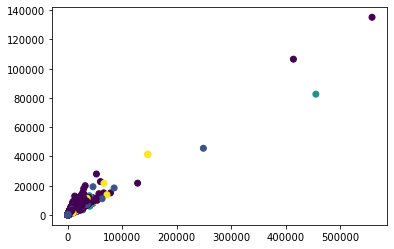

In [35]:
import matplotlib.pyplot as plt
plt.scatter(games_copy["total_playtime"], games_copy["favorite_genre_playtime"], c=clusters)

In the next section we will explore our review and popularity features. 
Questions to explore include, are the most played games, also the ones with the best reviews?

In [20]:
game_info.head()

,game_info,reviews,review_summary,appid,name,genres
0,"{'name': 'Warframe', 'steam_appid': 230410, 'g...",0.52,"{'review_score': 8.0, 'total_positive': 1009, ...",230410.0,Warframe,"[Action, Free to Play]"
1,"{'name': 'Rust', 'steam_appid': 252490, 'genre...",0.91,"{'review_score': 8.0, 'total_positive': 169918...",252490.0,Rust,"[Action, Adventure, Indie, Massively Multiplay..."
2,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.52,"{'review_score': 7.0, 'total_positive': 39, 't...",12250.0,Grand Theft Auto: San Andreas,[]
3,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.77,"{'review_score': 8.0, 'total_positive': 12549,...",12120.0,Grand Theft Auto: San Andreas,[Action]
4,"{'name': 'Game Dev Tycoon', 'steam_appid': 239...",0.70,"{'review_score': 8.0, 'total_positive': 16966,...",239820.0,Game Dev Tycoon,"[Casual, Indie, Simulation, Strategy]"


Here, I extracted two useful columns for our analysis to not deal with nested dictionaries

In [21]:
review_df = pd.DataFrame()
review_scores = []
total_reviews = []
for review in game_info['review_summary']:
    if review is None:
    # print(review['review_score'] is None)
    # print(review['total_reviews'] is None)
    # if (review['review_score'] is None or review['total_reviews'] is None):
        review_scores.append(0)
        total_reviews.append(0)
    else:
        review_scores.append(review['review_score'])
        total_reviews.append(review['total_reviews'])
# print(len(total_reviews) == len(game_info['review_summary']))
game_info['review_score'] = review_scores
game_info['total_reviews'] = total_reviews
game_info.head()

,game_info,reviews,review_summary,appid,name,genres,review_score,total_reviews
0,"{'name': 'Warframe', 'steam_appid': 230410, 'g...",0.52,"{'review_score': 8.0, 'total_positive': 1009, ...",230410.0,Warframe,"[Action, Free to Play]",8.0,1145
1,"{'name': 'Rust', 'steam_appid': 252490, 'genre...",0.91,"{'review_score': 8.0, 'total_positive': 169918...",252490.0,Rust,"[Action, Adventure, Indie, Massively Multiplay...",8.0,197753
2,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.52,"{'review_score': 7.0, 'total_positive': 39, 't...",12250.0,Grand Theft Auto: San Andreas,[],7.0,40
3,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.77,"{'review_score': 8.0, 'total_positive': 12549,...",12120.0,Grand Theft Auto: San Andreas,[Action],8.0,14311
4,"{'name': 'Game Dev Tycoon', 'steam_appid': 239...",0.70,"{'review_score': 8.0, 'total_positive': 16966,...",239820.0,Game Dev Tycoon,"[Casual, Indie, Simulation, Strategy]",8.0,17926


In [22]:
total_playtime = {}
for game in game_info['appid']:
    total_playtime[game] = 0
# print(total_playtime)
for i, game in enumerate(games['games']):
    for _, row in game.iterrows():
        appid = row["appid"]
        playtime = row["playtime_forever"]
        if appid in total_playtime:
            total_playtime[appid] += playtime

total_playtime_tuples = list(reversed(sorted(
    [(k, v) for k, v in total_playtime.items()], 
    key=lambda t: t[1]
    )))

        # if appid in total_playtime:
        #     # print(playtime)
        #     total_playtime[appid] += playtime


[(730.0, 8113030.466666634), (578080.0, 830155.1166666677), (252490.0, 705592.5), (271590.0, 547088.6833333324), (4000.0, 509672.5499999999), (359550.0, 458797.1666666674), (1085660.0, 339260.0999999996), (381210.0, 301001.4833333328), (252950.0, 286334.3999999997), (10.0, 237648.75000000017)]
Int64Index([12], dtype='int64')
Int64Index([21], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([5], dtype='int64')
Int64Index([46], dtype='int64')
Int64Index([171], dtype='int64')
Int64Index([36], dtype='int64')
Int64Index([436], dtype='int64')
Int64Index([19], dtype='int64')
Int64Index([271], dtype='int64')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

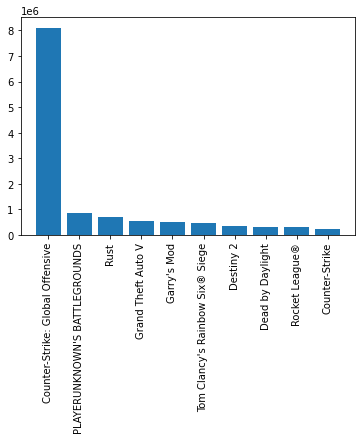

In [23]:
#validation below
print(total_playtime_tuples[:10])

def get_game_name(appid):
    matching_indices = game_info.index[game_info["appid"] == appid]
    print(matching_indices)
    return game_info["name"][game_info.index[game_info["appid"] == appid].tolist()].iloc[0]


plt.bar(list(map(lambda x: get_game_name(x[0]), total_playtime_tuples[:10])), list(map(lambda x: x[1], total_playtime_tuples[:10])))
plt.xticks(rotation=90)

In [24]:
# Stolen from Reddit's algorithm (https://gist.github.com/amix/8d14ff0a920d5c15738a#file-sorts-py)

# Rewritten code from /r2/r2/lib/db/_sorts.pyx
from math import sqrt

def _confidence(ups, downs):
    n = ups + downs

    if n == 0:
        return 0

    z = 1.281551565545
    p = float(ups) / n

    left = p + 1/(2*n)*z*z
    right = z*sqrt(p*(1-p)/n + z*z/(4*n*n))
    under = 1+1/n*z*z

    return (left + right) / under, (left - right) / under

def confidence(ups, downs):
    if ups + downs == 0:
        return (0, 0)
    else:
        return _confidence(ups, downs)

In [25]:
with open("review_info.json") as f:
    review_info = json.loads(f.read())["reviews"]

Int64Index([2195], dtype='int64')
Int64Index([76], dtype='int64')
Int64Index([1746], dtype='int64')
Int64Index([7526], dtype='int64')
Int64Index([191], dtype='int64')
Int64Index([431], dtype='int64')
Int64Index([1752], dtype='int64')
Int64Index([491], dtype='int64')
Int64Index([1389], dtype='int64')
Int64Index([1856], dtype='int64')
['DOOM Eternal', 'Terraria', 'Yakuza 0', 'Outer Wilds', 'Half-Life: Alyx', 'Hollow Knight', 'ULTRAKILL', 'Monster Hunter: World', 'DARK SOULS™ III', 'Deep Rock Galactic'] [0.9946787137758936, 0.9935057550985638, 0.9923838048082841, 0.9915185174726799, 0.9914744903859446, 0.99095819783, 0.990203106935937, 0.9891694229829551, 0.9886452747903811, 0.9884637349788672]


(0.95, 1.0)

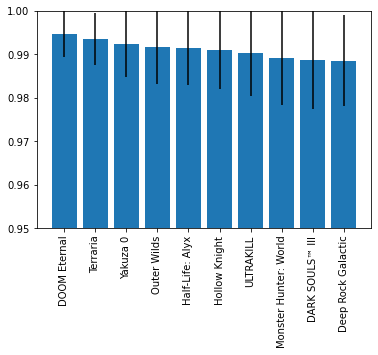

In [26]:
review_scores = {}
for game in review_info:
    for appid, reviews in game.items():
        n_up = len(list(filter(lambda x: x["voted_up"], reviews)))
        n_down = len(list(filter(lambda x: not x["voted_up"], reviews)))
        score = confidence(n_up, n_down)
        review_scores[appid] = score

review_score_tuples = list(reversed(sorted(
    [(k, v) for k, v in review_scores.items()], 
    key=lambda t: t[1][1]
    )))

names = list(map(lambda x: get_game_name(float(x[0])), review_score_tuples[:10]))
scores_low = list(map(lambda x: x[1][1], review_score_tuples[:10]))
scores_hi = list(map(lambda x: x[1][0], review_score_tuples[:10]))
errs = []
for i in range(10):
    errs.append(scores_hi[i] - scores_low[i])
print(names, scores_low)
plt.bar(names, scores_low, yerr=errs)
plt.xticks(rotation=90)
plt.ylim(bottom=0.95, top=1.0)

Do more niche games do better than popular games?

Int64Index([12], dtype='int64')
Int64Index([21], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([5], dtype='int64')
Int64Index([46], dtype='int64')
Int64Index([171], dtype='int64')
Int64Index([36], dtype='int64')
Int64Index([436], dtype='int64')
Int64Index([19], dtype='int64')
Int64Index([271], dtype='int64')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

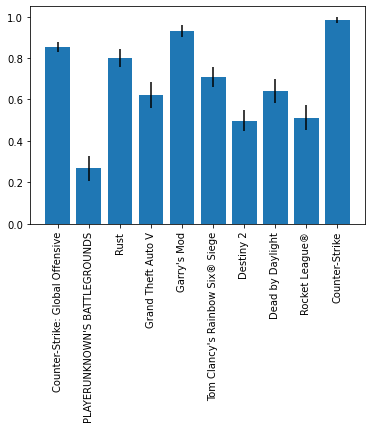

In [27]:
top_playtime_scores = {}
for appid, _ in total_playtime_tuples[:10]:
    score_hi, score_lo = review_scores[str(round(appid))]
    top_playtime_scores[appid] = (score_hi, score_lo)

names = list(map(lambda x: get_game_name(x[0]), top_playtime_scores.items()))
scores_hi = list(map(lambda x: x[1][0], top_playtime_scores.items()))
scores_lo = list(map(lambda x: x[1][1], top_playtime_scores.items()))
errs = []
for i in range(10):
    errs.append(scores_hi[i] - scores_lo[i])

plt.bar(names, scores_lo, yerr=errs)
plt.xticks(rotation=90)

In [45]:
def get_game_genres(appid):
    matching_indices = game_info.index[game_info["appid"] == appid]
    return game_info["genres"][game_info.index[game_info["appid"] == appid].tolist()].iloc[0]

In [53]:
import math
top_genre_games = {"Action" : [], "Massively Multiplayer": [] , "Indie": [], "Simulation": [], "Adventure": []}
for genre in list(top_genre_games.keys()):
    for app in total_playtime_tuples:
        if not math.isnan(app[0]):
            app_genres = get_game_genres(app[0])
            if genre in app_genres:
                if len(top_genre_games[genre]) < 10:
                    top_genre_games[genre].append(app)

In [54]:
print(top_genre_games)

{'Action': [(730.0, 8113030.466666634), (578080.0, 830155.1166666677), (252490.0, 705592.5), (271590.0, 547088.6833333324), (359550.0, 458797.1666666674), (1085660.0, 339260.0999999996), (381210.0, 301001.4833333328), (252950.0, 286334.3999999997), (10.0, 237648.75000000017), (304930.0, 211124.00000000015)], 'Massively Multiplayer': [(578080.0, 830155.1166666677), (252490.0, 705592.5), (346110.0, 168213.09999999995), (236390.0, 75291.9666666666), (438100.0, 70221.98333333325), (444200.0, 63013.333333333285), (221100.0, 56219.05000000001), (238960.0, 50796.69999999997), (433850.0, 47481.000000000044), (582660.0, 47105.23333333334)], 'Indie': [(252490.0, 705592.5), (4000.0, 509672.5499999999), (252950.0, 286334.3999999997), (304930.0, 211124.00000000015), (227300.0, 210285.78333333373), (346110.0, 168213.09999999995), (105600.0, 163353.81666666697), (431960.0, 82896.95000000003), (291550.0, 54238.93333333327), (238960.0, 50796.69999999997)], 'Simulation': [(4000.0, 509672.5499999999), (2

Int64Index([12], dtype='int64')
Int64Index([21], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([5], dtype='int64')
Int64Index([171], dtype='int64')
Int64Index([36], dtype='int64')
Int64Index([436], dtype='int64')
Int64Index([19], dtype='int64')
Int64Index([271], dtype='int64')
Int64Index([125], dtype='int64')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

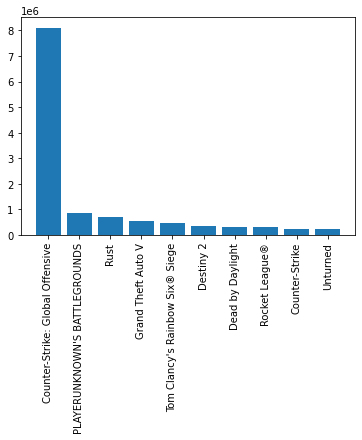

In [55]:
plt.bar(list(map(lambda x: get_game_name(x[0]), top_genre_games["Action"])), list(map(lambda x: x[1], top_genre_games["Action"])))
plt.xticks(rotation=90)

Int64Index([21], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([705], dtype='int64')
Int64Index([93], dtype='int64')
Int64Index([786], dtype='int64')
Int64Index([194], dtype='int64')
Int64Index([1766], dtype='int64')
Int64Index([875], dtype='int64')
Int64Index([27], dtype='int64')
Int64Index([228], dtype='int64')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

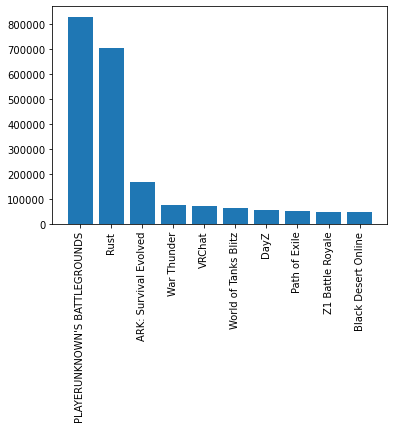

In [56]:
plt.bar(list(map(lambda x: get_game_name(x[0]), top_genre_games["Massively Multiplayer"])), list(map(lambda x: x[1], top_genre_games["Massively Multiplayer"])))
plt.xticks(rotation=90)

Int64Index([1], dtype='int64')
Int64Index([46], dtype='int64')
Int64Index([19], dtype='int64')
Int64Index([125], dtype='int64')
Int64Index([292], dtype='int64')
Int64Index([705], dtype='int64')
Int64Index([76], dtype='int64')
Int64Index([772], dtype='int64')
Int64Index([11], dtype='int64')
Int64Index([875], dtype='int64')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

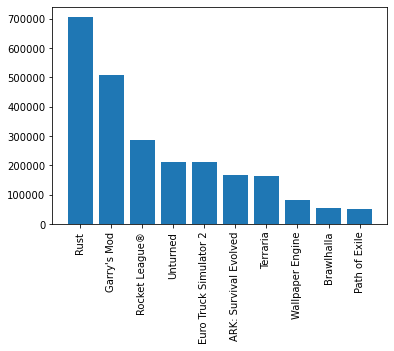

In [57]:
plt.bar(list(map(lambda x: get_game_name(x[0]), top_genre_games["Indie"])), list(map(lambda x: x[1], top_genre_games["Indie"])))
plt.xticks(rotation=90)

Int64Index([46], dtype='int64')
Int64Index([292], dtype='int64')
Int64Index([896], dtype='int64')
Int64Index([93], dtype='int64')
Int64Index([415], dtype='int64')
Int64Index([786], dtype='int64')
Int64Index([228], dtype='int64')
Int64Index([2243], dtype='int64')
Int64Index([104], dtype='int64')
Int64Index([452], dtype='int64')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

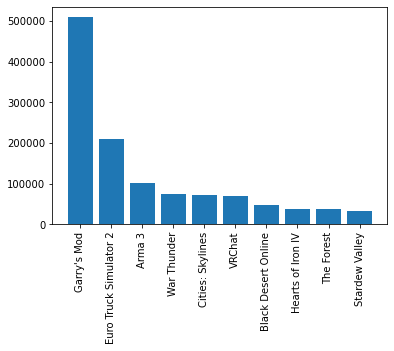

In [58]:
plt.bar(list(map(lambda x: get_game_name(x[0]), top_genre_games["Simulation"])), list(map(lambda x: x[1], top_genre_games["Simulation"])))
plt.xticks(rotation=90)

Int64Index([21], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([5], dtype='int64')
Int64Index([36], dtype='int64')
Int64Index([125], dtype='int64')
Int64Index([705], dtype='int64')
Int64Index([76], dtype='int64')
Int64Index([786], dtype='int64')
Int64Index([1766], dtype='int64')
Int64Index([875], dtype='int64')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

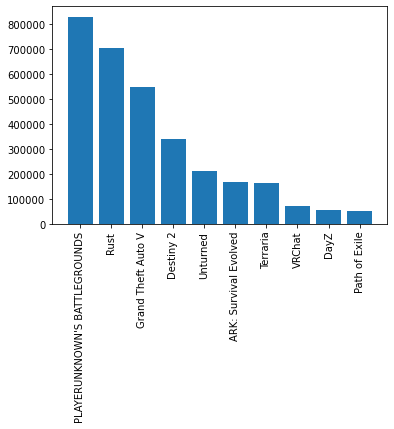

In [59]:
plt.bar(list(map(lambda x: get_game_name(x[0]), top_genre_games["Adventure"])), list(map(lambda x: x[1], top_genre_games["Adventure"])))
plt.xticks(rotation=90)